In [33]:
import pandas as pd
from zipfile import ZipFile
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Load Data:

In [28]:
# update releavent path
path = 'C:/Users/gony/Downloads/MINDsmall_train.zip'

In [4]:
dfs = {}
with ZipFile(path, "r") as f:
    for name in f.namelist():
        if name.endswith('.tsv'):
            with f.open(name) as zd:
                if name == 'news.tsv':
                    columns = ['News ID',
                                "Category",
                                "SubCategory",
                                "Title",
                                "Abstract",
                                "URL",
                                "Title Entities",
                                "Abstract Entities "]
                elif name == 'behaviors.tsv':
                    columns = ['Impression ID',
                              'User ID',
                              'Time',
                              'History',
                              'impressions']
                print(name)
                df = pd.read_csv(zd, encoding='utf8', sep = '\t', 
                                 header=None, names=columns)
                dfs[name] = df
behaviors = dfs["behaviors.tsv"]
news = dfs['news.tsv']

behaviors.tsv
news.tsv


In [5]:
news.head()


,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [6]:
behaviors.head()

,Impression ID,User ID,Time,History,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


## Analysis:

In [21]:
temp = len(news['News ID'].values)
print(f'there are {temp} different news articles in the training set')
temp = len(np.unique(behaviors['User ID'].values))
print(f'there are {temp} different users in the training set')

there are 51282 different news articles in the training set
there are 50000 different users in the training set


In [24]:
time_list = behaviors['Time'].values

The different news categories:
['autos' 'entertainment' 'finance' 'foodanddrink' 'health' 'kids'
 'lifestyle' 'middleeast' 'movies' 'music' 'news' 'northamerica' 'sports'
 'travel' 'tv' 'video' 'weather']


Text(0.5, 1.0, 'Category Histogram')

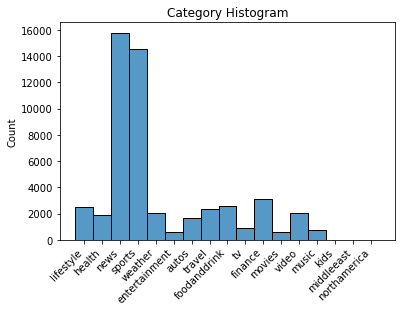

In [35]:
category_list = news['Category'].values
print('The different news categories:')
print(np.unique(category_list))

sns.histplot(category_list)
plt.xticks(rotation=45, ha='right')
plt.title('Category Histogram')
plt.show()

In [37]:
subcategory_list = news['SubCategory'].values
print('The different news subcategories:')
print(np.unique(subcategory_list))


The different news subcategories:
['ads-latingrammys' 'ads-lung-health' 'advice' 'animals' 'autosbuying'
 'autoscartech' 'autosclassics' 'autoscompact' 'autosenthusiasts'
 'autoshybrids' 'autoslosangeles' 'autosluxury' 'autosmidsize'
 'autosmotorcycles' 'autosnews' 'autosownership' 'autospassenger'
 'autosresearch' 'autosresearchguides' 'autosreview' 'autossema'
 'autossports' 'autossuvs' 'autostokyo' 'autostrucks' 'autosvans'
 'autosvideonew' 'autosvideos' 'awards' 'awardstyle' 'baseball'
 'baseball_mlb' 'baseball_mlb_videos' 'basketball_nba'
 'basketball_nba_videos' 'basketball_ncaa' 'basketball_ncaa_videos'
 'basketball_wnba' 'beverages' 'boxing' 'boxing-mma' 'cardio'
 'career-news' 'causes' 'causes-animals' 'causes-disaster-relief'
 'causes-environment' 'causes-food-insecurity' 'causes-green-living'
 'causes-military-appreciation' 'causes-poverty' 'celebhub' 'celebrity'
 'celebritynews' 'cma-awards' 'cocktails' 'comedy' 'company-news'
 'cooking' 'cookingschool' 'downtime' 'election

#### Examining the different subcategories in the 'News' Category:


the different subcategories under the news category:
['causes' 'causes-disaster-relief' 'causes-environment'
 'causes-military-appreciation' 'causes-poverty' 'elections-2020-us'
 'empowering-the-planet' 'factcheck' 'indepth' 'narendramodi_opinion'
 'newsbusiness' 'newscrime' 'newselection2020' 'newsfactcheck'
 'newsgoodnews' 'newsnational' 'newsoffbeat' 'newsopinion' 'newsother'
 'newsphotos' 'newspolitics' 'newsrealestate' 'newsscience'
 'newsscienceandtechnology' 'newstvmedia' 'newsus' 'newsvideo'
 'newsweather' 'newsworld' 'newsworldpolitics' 'personalfinance' 'photos'
 'yearinoffbeatgoodnews']


Text(0.5, 1.0, 'News SubCategory Histogram')

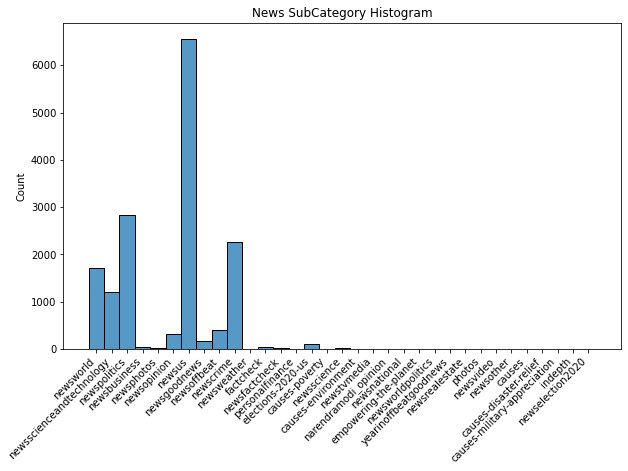

In [43]:
subcategory_list = news[news['Category'] == 'news']['SubCategory'].values
print(f'the different subcategories under the news category:')
print(np.unique(subcategory_list))

plt.figure(figsize=(10,6))
sns.histplot(subcategory_list)
plt.xticks(rotation=45, ha='right')
plt.title('News SubCategory Histogram')
plt.show()

#### examining the news shown to each user:

In [54]:
temp = behaviors['History'].values
histories = []
for x in temp:
    try:
        histories.append(x.split(' '))
    except:
        histories.append(x)

In [55]:
histories_len = []
for x in temp:
    try:
        histories_len.append(len(x))
    except:
        histories_len.append(0)

In [69]:
np.mean(histories_len), np.median(histories_len)

(220.90456471187844, 129.0)

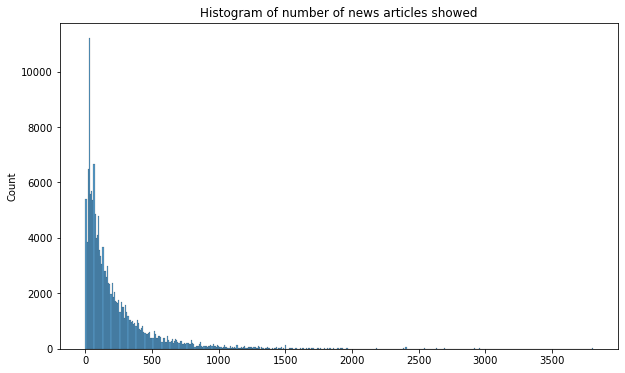

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(histories_len)
plt.title('Histogram of number of news articles showed')
plt.show()

#### Examining how many news articles did each user click on (in relation to those shown to him)

In [62]:
temp = behaviors['impressions'].values
impressions_list = []
for x in temp:
    impressions_list.append(x.split(' '))

In [66]:
read_list = []
for x in impressions_list:
    tot_read = 0
    for y in x:
        tot_read+=int(y.split('-')[1])
    read_list.append(tot_read/len(x))

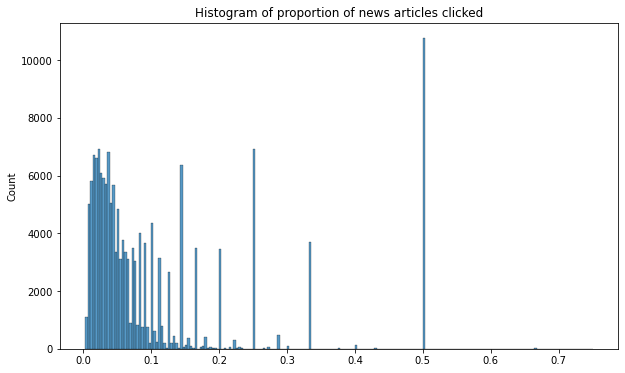

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(read_list)
plt.title('Histogram of proportion of news articles clicked')
plt.show()